In [65]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
#!pip install git+https://github.com/pydata/pandas-datareader.git
#!pip install yfinance
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime
from datetime import timedelta,date

#LSTM
#!pip install scikit-learn
#!pip install tensorflow
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import tensorflow as tf
#ARIMA
from statsmodels.tsa.arima_model import ARIMA
import sklearn.metrics as met

In [66]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN',"TSLA", "VOO", "SPY", "META", "GRAB", "DPLS", "CIBR", "SAGE"]

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN',"TSLA", "VOO", "SPY", "META", "GRAB", "DPLS", "CIBR", "SAGE"]



end = datetime(2022, 3, 11)
start = datetime(end.year - 5, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    
tesla_data = globals()['TSLA']


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [67]:
company_list = [AAPL, GOOG, MSFT, AMZN, TSLA, VOO, SPY, GRAB, DPLS, CIBR, SAGE]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON", "TESLA","VANGUARD 500", "S&P 500",
                "GRAB", "DARK PULSE", "FIRST TRUST", "SAGE"]

In [68]:
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-02-25,34.049999,36.720001,34.049999,36.650002,36.650002,976100,SAGE
2022-02-28,35.980000,36.889999,35.630001,36.369999,36.369999,718000,SAGE
2022-03-01,36.330002,37.980000,36.220001,36.610001,36.610001,657600,SAGE
2022-03-02,36.619999,37.240002,35.935001,36.119999,36.119999,442600,SAGE
2022-03-03,36.099998,36.180000,34.590000,34.860001,34.860001,401300,SAGE
2022-03-04,34.740002,35.327000,33.689999,33.930000,33.930000,351900,SAGE
2022-03-07,33.840000,34.630001,32.639999,32.730000,32.730000,473200,SAGE
2022-03-08,32.950001,33.320000,31.760000,32.009998,32.009998,402300,SAGE
2022-03-09,32.570000,32.915001,32.000000,32.770000,32.770000,609400,SAGE


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12921 entries, 2017-03-10 to 2022-03-10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          12921 non-null  float64
 1   High          12921 non-null  float64
 2   Low           12921 non-null  float64
 3   Close         12921 non-null  float64
 4   Adj Close     12921 non-null  float64
 5   Volume        12921 non-null  int64  
 6   company_name  12921 non-null  object 
dtypes: float64(5), int64(1), object(1)
memory usage: 807.6+ KB


In [70]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2017-03-10,34.812500,34.840000,34.660000,34.785000,32.842602,78451200,APPLE
2017-03-13,34.712502,34.857498,34.705002,34.799999,32.856762,69686800,APPLE
2017-03-14,34.825001,34.912498,34.709999,34.747501,32.807194,61236400,APPLE
2017-03-15,34.852501,35.187500,34.757500,35.115002,33.154179,102767200,APPLE
2017-03-16,35.180000,35.255001,35.064999,35.172501,33.208469,76928000,APPLE


In [71]:
#file_name = 'Stock.xlsx'
  
# saving the excelsheet
##df.to_excel(file_name)
#print('Stock successfully exported into Excel File')

In [72]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03
mean,79.733574,80.619018,78.874047,79.783371,78.574558,1.203226e+08
std,43.473641,44.003515,42.920130,43.478081,43.953247,5.549138e+07
min,34.712502,34.840000,34.654999,34.747501,32.807194,4.100000e+07
25%,43.688749,43.900001,43.396251,43.734376,42.078813,8.347248e+07
50%,55.895000,56.523750,55.161251,55.951250,54.275850,1.053918e+08
75%,121.817499,123.539997,120.275002,121.779999,120.879837,1.406946e+08
max,182.630005,182.940002,179.119995,182.009995,181.778397,4.265100e+08


In [73]:

AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2017-03-10 to 2022-03-10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1260 non-null   float64
 1   High          1260 non-null   float64
 2   Low           1260 non-null   float64
 3   Close         1260 non-null   float64
 4   Adj Close     1260 non-null   float64
 5   Volume        1260 non-null   int64  
 6   company_name  1260 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 78.8+ KB


In [74]:
GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03
mean,1513.249151,1528.505647,1498.695975,1514.010035,1514.010035,1.566105e+06
std,628.840921,634.597431,622.474493,628.283707,628.283707,6.951508e+05
min,806.950012,821.630005,803.369995,814.429993,814.429993,3.468000e+05
25%,1077.410034,1089.855042,1065.202484,1078.687469,1078.687469,1.124500e+06
50%,1221.604980,1230.409973,1209.309998,1218.880005,1218.880005,1.393000e+06
75%,1757.562531,1773.602478,1741.559967,1760.230042,1760.230042,1.783100e+06
max,3037.270020,3042.000000,2997.750000,3014.179932,3014.179932,6.207000e+06


In [75]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2017-03-10 to 2022-03-10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1260 non-null   float64
 1   High          1260 non-null   float64
 2   Low           1260 non-null   float64
 3   Close         1260 non-null   float64
 4   Adj Close     1260 non-null   float64
 5   Volume        1260 non-null   int64  
 6   company_name  1260 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 78.8+ KB


In [76]:
MSFT.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03
mean,163.365492,164.937175,161.687722,163.399484,160.209818,2.911127e+07
std,78.531922,79.307827,77.693709,78.536324,79.678085,1.307164e+07
min,64.120003,64.550003,64.120003,64.209999,59.939060,7.425600e+06
25%,99.287500,100.075001,97.897503,98.922497,94.771708,2.073435e+07
50%,138.470001,139.300003,136.759995,137.959999,134.583290,2.575515e+07
75%,217.587502,220.172501,215.145004,217.997494,215.583199,3.335412e+07
max,344.619995,349.670013,342.200012,343.109985,342.402008,1.112421e+08


In [77]:
MSFT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2017-03-10 to 2022-03-10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1260 non-null   float64
 1   High          1260 non-null   float64
 2   Low           1260 non-null   float64
 3   Close         1260 non-null   float64
 4   Adj Close     1260 non-null   float64
 5   Volume        1260 non-null   int64  
 6   company_name  1260 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 78.8+ KB


In [78]:
AMZN.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03
mean,2170.088112,2193.207260,2143.861096,2168.768714,2168.768714,4.293384e+06
std,862.899728,873.372552,851.214509,861.514078,861.514078,2.065991e+06
min,838.070007,849.369995,833.500000,843.200012,843.200012,8.813000e+05
25%,1587.725037,1600.807495,1573.089996,1587.955048,1587.955048,2.904150e+06
50%,1871.984985,1889.090027,1854.760010,1869.735046,1869.735046,3.704500e+06
75%,3149.397583,3185.559998,3109.189941,3145.194885,3145.194885,5.079850e+06
max,3744.000000,3773.080078,3696.790039,3731.409912,3731.409912,1.656500e+07


In [79]:
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2017-03-10 to 2022-03-10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1260 non-null   float64
 1   High          1260 non-null   float64
 2   Low           1260 non-null   float64
 3   Close         1260 non-null   float64
 4   Adj Close     1260 non-null   float64
 5   Volume        1260 non-null   int64  
 6   company_name  1260 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 78.8+ KB


In [80]:
VOO.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03
mean,293.706595,295.206230,291.993334,293.707206,282.414134,3.662407e+06
std,63.421255,63.712776,63.063664,63.415340,68.360645,2.682851e+06
min,209.630005,210.779999,200.550003,204.270004,195.223038,7.683000e+05
25%,247.604996,249.454994,246.252502,248.017502,231.631081,2.086350e+06
50%,268.029999,269.324997,267.065002,268.470001,255.919899,2.923450e+06
75%,337.057503,338.707489,335.332504,337.042511,329.945335,4.209375e+06
max,440.579987,441.260010,437.660004,439.250000,437.775574,2.466930e+07


In [81]:
VOO.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2017-03-10 to 2022-03-10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1260 non-null   float64
 1   High          1260 non-null   float64
 2   Low           1260 non-null   float64
 3   Close         1260 non-null   float64
 4   Adj Close     1260 non-null   float64
 5   Volume        1260 non-null   int64  
 6   company_name  1260 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 78.8+ KB


In [82]:
TSLA.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03
mean,283.104875,289.443398,276.217357,283.145701,283.145701,4.469119e+07
std,322.747493,330.059620,314.485838,322.552910,322.552910,3.009843e+07
min,36.220001,37.335999,35.397999,35.793999,35.793999,9.800600e+06
25%,61.188500,62.132500,60.008999,61.215999,61.215999,2.523975e+07
50%,70.992001,71.998001,70.000999,70.984001,70.984001,3.493900e+07
75%,581.269974,598.082489,564.120010,578.622498,578.622498,5.207212e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08


In [83]:
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2017-03-10 to 2022-03-10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1260 non-null   float64
 1   High          1260 non-null   float64
 2   Low           1260 non-null   float64
 3   Close         1260 non-null   float64
 4   Adj Close     1260 non-null   float64
 5   Volume        1260 non-null   int64  
 6   company_name  1260 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 78.8+ KB


In [84]:
SPY.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03
mean,319.540738,321.252770,317.614373,319.546159,307.681914,8.416212e+07
std,68.880514,69.200433,68.487475,68.880973,74.178336,4.608803e+07
min,228.190002,229.679993,218.259995,222.949997,213.065170,2.027000e+07
25%,269.319992,271.487495,267.602486,269.777496,252.658096,5.532298e+07
50%,291.694992,293.214996,290.450012,292.019989,278.909653,7.121980e+07
75%,366.839996,368.504990,364.847504,366.805008,359.327133,9.736342e+07
max,479.220001,479.980011,476.059998,477.709991,476.230530,3.922207e+08


In [85]:
SPY.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2017-03-10 to 2022-03-10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1260 non-null   float64
 1   High          1260 non-null   float64
 2   Low           1260 non-null   float64
 3   Close         1260 non-null   float64
 4   Adj Close     1260 non-null   float64
 5   Volume        1260 non-null   int64  
 6   company_name  1260 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 78.8+ KB


In [86]:
GRAB.describe()

,Open,High,Low,Close,Adj Close,Volume
count,321.000000,321.000000,321.000000,321.000000,321.000000,3.210000e+02
mean,11.004935,11.309735,10.632386,10.916860,10.916860,6.751986e+06
std,2.880399,3.010211,2.761629,2.859113,2.859113,1.591250e+07
min,3.165000,3.360000,2.980000,3.140000,3.140000,5.000000e+02
25%,10.250000,10.330000,10.190000,10.220000,10.220000,2.717000e+05
50%,11.550000,11.770000,11.250000,11.450000,11.450000,7.382000e+05
75%,13.100000,13.450000,12.650000,12.920000,12.920000,5.867700e+06
max,17.260000,18.108999,15.550000,17.059999,17.059999,1.788307e+08


In [87]:
GRAB.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 321 entries, 2020-12-01 to 2022-03-10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          321 non-null    float64
 1   High          321 non-null    float64
 2   Low           321 non-null    float64
 3   Close         321 non-null    float64
 4   Adj Close     321 non-null    float64
 5   Volume        321 non-null    int64  
 6   company_name  321 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 20.1+ KB


In [88]:
DPLS.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03
mean,0.034447,0.037055,0.031420,0.033997,0.033997,3.841562e+07
std,0.046930,0.051823,0.042057,0.046228,0.046228,1.025666e+08
min,0.000100,0.000100,0.000010,0.000100,0.000100,0.000000e+00
25%,0.000300,0.000400,0.000250,0.000300,0.000300,1.534825e+04
50%,0.013250,0.014650,0.011500,0.012725,0.012725,9.733150e+05
75%,0.051437,0.055000,0.050078,0.051000,0.051000,3.167707e+07
max,0.240000,0.490000,0.230000,0.240000,0.240000,9.952396e+08


In [89]:
DPLS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2017-03-10 to 2022-03-10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1260 non-null   float64
 1   High          1260 non-null   float64
 2   Low           1260 non-null   float64
 3   Close         1260 non-null   float64
 4   Adj Close     1260 non-null   float64
 5   Volume        1260 non-null   int64  
 6   company_name  1260 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 78.8+ KB


In [90]:
CIBR.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03
mean,32.360604,32.613509,32.056421,32.351501,31.819006,3.803914e+05
std,9.698747,9.784532,9.582504,9.693139,9.875563,4.098540e+05
min,20.620001,20.799999,20.590000,20.629999,20.023630,2.720000e+04
25%,25.200001,25.448000,24.907500,25.155750,24.501114,1.289000e+05
50%,28.530001,28.712500,28.317500,28.549999,27.834762,2.499500e+05
75%,39.694999,40.117500,39.180250,39.884999,39.604644,5.026250e+05
max,56.150002,56.583000,55.599998,56.110001,55.788002,5.282700e+06


In [91]:
CIBR.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2017-03-10 to 2022-03-10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1260 non-null   float64
 1   High          1260 non-null   float64
 2   Low           1260 non-null   float64
 3   Close         1260 non-null   float64
 4   Adj Close     1260 non-null   float64
 5   Volume        1260 non-null   int64  
 6   company_name  1260 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 78.8+ KB


In [92]:
SAGE.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03
mean,97.640991,99.824002,95.407248,97.570440,97.570440,6.384569e+05
std,49.132735,50.036165,48.216390,49.131814,49.131814,7.947264e+05
min,26.500000,27.160000,25.010000,25.950001,25.950001,1.080000e+04
25%,56.442500,57.427500,54.991500,56.297501,56.297501,3.434500e+05
50%,79.135002,80.865002,77.270000,78.954998,78.954998,4.598000e+05
75%,151.395000,153.972496,147.622498,150.840004,150.840004,6.742750e+05
max,191.220001,195.970001,187.539993,192.330002,192.330002,1.756790e+07


In [93]:
SAGE.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2017-03-10 to 2022-03-10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1260 non-null   float64
 1   High          1260 non-null   float64
 2   Low           1260 non-null   float64
 3   Close         1260 non-null   float64
 4   Adj Close     1260 non-null   float64
 5   Volume        1260 non-null   int64  
 6   company_name  1260 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 78.8+ KB


In [94]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2017-03-10,34.812500,34.840000,34.660000,34.785000,32.842602,78451200,APPLE
2017-03-13,34.712502,34.857498,34.705002,34.799999,32.856762,69686800,APPLE
2017-03-14,34.825001,34.912498,34.709999,34.747501,32.807194,61236400,APPLE
2017-03-15,34.852501,35.187500,34.757500,35.115002,33.154179,102767200,APPLE
2017-03-16,35.180000,35.255001,35.064999,35.172501,33.208469,76928000,APPLE


In [95]:
df["High-Low"] = df["High"]-df["Low"]

In [96]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,company_name,High-Low
Date,,,,,,,,
2017-03-10,34.812500,34.840000,34.660000,34.785000,32.842602,78451200,APPLE,0.180000
2017-03-13,34.712502,34.857498,34.705002,34.799999,32.856762,69686800,APPLE,0.152496
2017-03-14,34.825001,34.912498,34.709999,34.747501,32.807194,61236400,APPLE,0.202499
2017-03-15,34.852501,35.187500,34.757500,35.115002,33.154179,102767200,APPLE,0.430000
2017-03-16,35.180000,35.255001,35.064999,35.172501,33.208469,76928000,APPLE,0.190002


In [97]:
#df=df.drop(columns = ['Hight-Low'])

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12921 entries, 2017-03-10 to 2022-03-10
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          12921 non-null  float64
 1   High          12921 non-null  float64
 2   Low           12921 non-null  float64
 3   Close         12921 non-null  float64
 4   Adj Close     12921 non-null  float64
 5   Volume        12921 non-null  int64  
 6   company_name  12921 non-null  object 
 7   High-Low      12921 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 908.5+ KB


<AxesSubplot:xlabel='Volume', ylabel='company_name'>

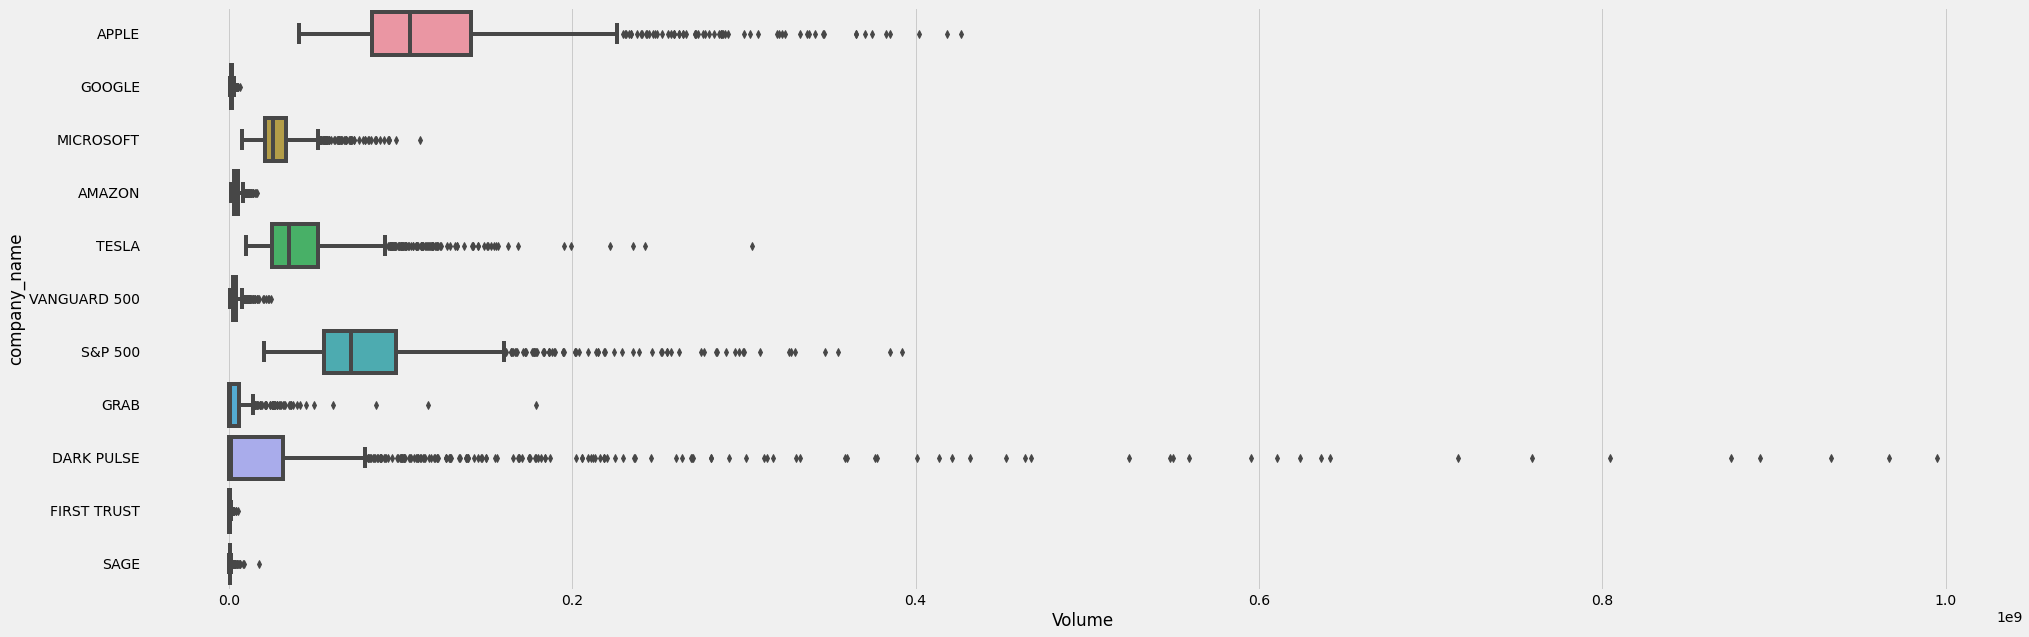

In [99]:
plt.figure(figsize=(30,10))
sns.boxplot(x=df["Volume"],y=df["company_name"],data =df)

In [100]:
tesla_df = df[df['company_name']=='TESLA'] #not require in function

In [101]:
len(tesla_df)

1260

In [102]:
tesla_df.head()

,Open,High,Low,Close,Adj Close,Volume,company_name,High-Low
Date,,,,,,,,
2017-03-10,49.242001,49.299999,48.599998,48.737999,48.737999,15331500,TESLA,0.700001
2017-03-13,48.964001,49.369999,48.556000,49.234001,49.234001,15113000,TESLA,0.813999
2017-03-14,49.222000,51.624001,49.203999,51.599998,51.599998,37992000,TESLA,2.420002
2017-03-15,51.400002,52.200001,50.854000,51.146000,51.146000,26654000,TESLA,1.346001
2017-03-16,52.480000,53.150002,51.812000,52.410000,52.410000,35661000,TESLA,1.338001


<AxesSubplot:xlabel='Volume', ylabel='company_name'>

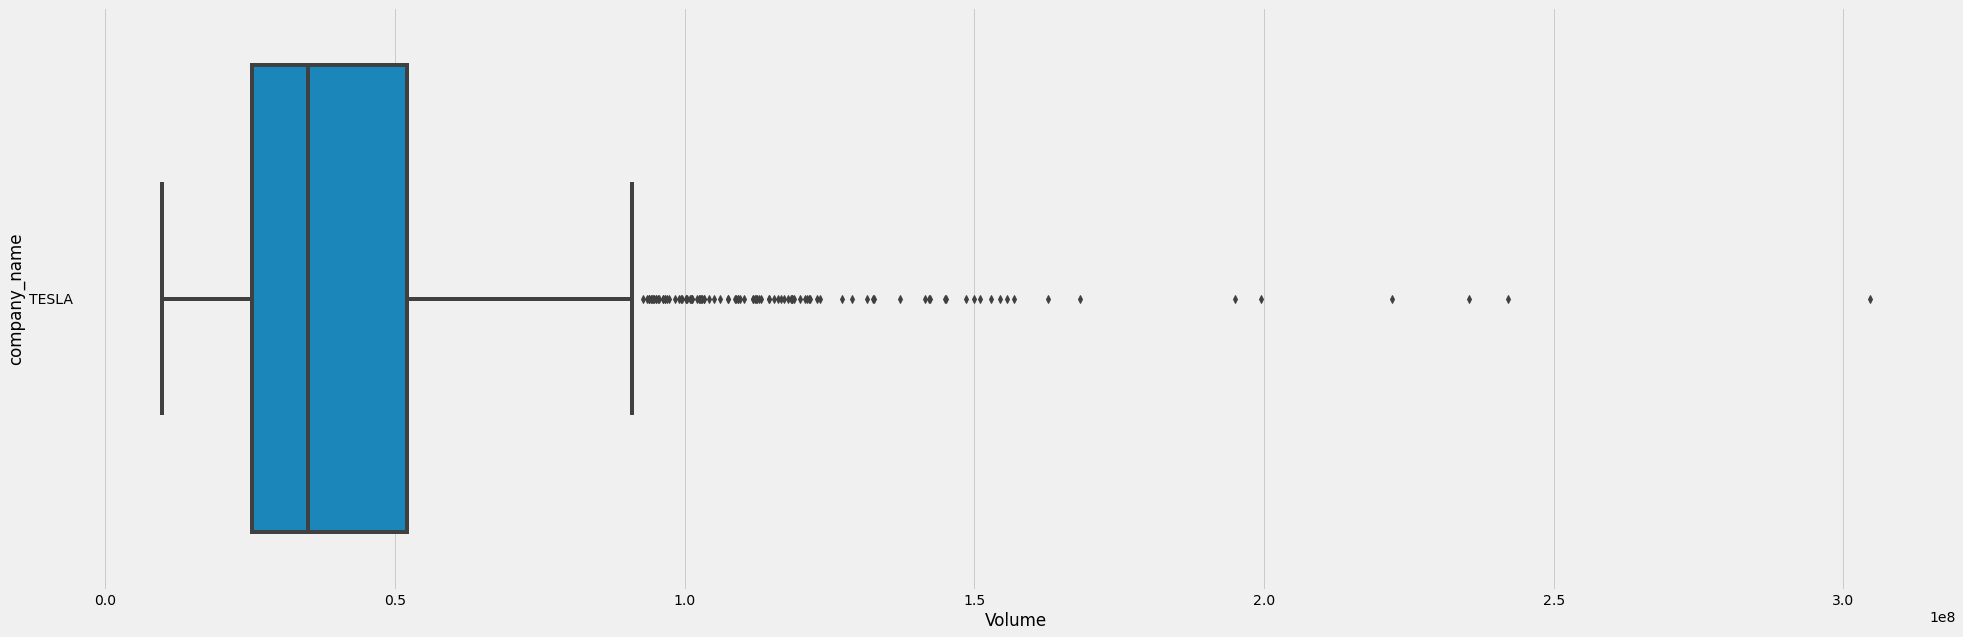

In [103]:
plt.figure(figsize=(30,10))
sns.boxplot(x=tesla_df["Volume"],y=tesla_df["company_name"],data =df)

In [104]:
tesla_df["company_name"].value_counts()

TESLA    1260
Name: company_name, dtype: int64

<AxesSubplot:>

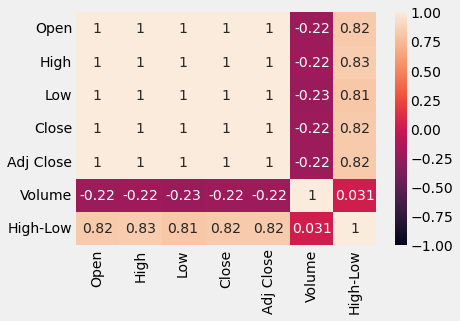

In [105]:
sns.heatmap(tesla_df.corr(), annot = True,vmin=-1, vmax=1)

### Large number of 1s and values close to 1 as variables show high positive correlations and are interrelated. This might be because of the minute difference between those values. However, in reality these small values play a huge role 

In [106]:
# Transform data to include useful columns to use later on
tesla_data['Open-high'] = tesla_data['Open']-tesla_data['High']
tesla_data['Open-low'] = tesla_data['Open'] - tesla_data['Low']
tesla_data['Close-high'] = tesla_data['Close']-tesla_data['High']
tesla_data['Close-low'] = tesla_data['Close'] - tesla_data['Low']
tesla_data['High-low'] = tesla_data['High'] - tesla_data['Low']
tesla_data['Open-close'] = tesla_data['Open'] - tesla_data['Close']


In [107]:
print(len(tesla_data))
tesla_data['DateTime'] = tesla_data.index
tesla_data['New_ID'] = range(1, 1+len(tesla_data))
tesla_data.index = tesla_data['New_ID']
tesla_data= tesla_data.drop(['New_ID'],axis=1)
ma_day = [30, 50]
for ma in ma_day:
    column_name = f"MovingAvg_{ma}"
    tesla_data[column_name] = tesla_data['Close'].rolling(ma).mean()
print(len(tesla_data))
for ma in ma_day:
    column_name = f"MovingAvg_{ma}"
    column_df = pd.DataFrame(tesla_data[column_name])
    date = datetime(2021, 3, 10)
    for day in range(1,ma+1):
        _ = tesla_data.head(day)['Close']
        avg = sum(_)/(day)
        tesla_data.at[day,column_name] = avg
        


# tesla_data.index = [i for i in range(1,255)]
print(len(tesla_data))
tesla_data.index = tesla_data['DateTime'] #change back index to date time for ML 
tesla_data= tesla_data.drop(['DateTime'],axis=1) #drop
tesla_data.head(10)
# tesla_data.tail(10)

#         print(avg)
#         tesla_data[column_name] = tesla_data[column_name].replace(np.nan, avg)
# tesla_data.head(30)

1260
1260
1260


,Open,High,Low,Close,Adj Close,Volume,company_name,Open-high,Open-low,Close-high,Close-low,High-low,Open-close,MovingAvg_30,MovingAvg_50
DateTime,,,,,,,,,,,,,,,
2017-03-10,49.242001,49.299999,48.599998,48.737999,48.737999,15331500,TESLA,-0.057999,0.642002,-0.562000,0.138000,0.700001,0.504002,48.737999,48.737999
2017-03-13,48.964001,49.369999,48.556000,49.234001,49.234001,15113000,TESLA,-0.405998,0.408001,-0.135998,0.678001,0.813999,-0.270000,48.986000,48.986000
2017-03-14,49.222000,51.624001,49.203999,51.599998,51.599998,37992000,TESLA,-2.402000,0.018002,-0.024002,2.396000,2.420002,-2.377998,49.857333,49.857333
2017-03-15,51.400002,52.200001,50.854000,51.146000,51.146000,26654000,TESLA,-0.799999,0.546001,-1.054001,0.292000,1.346001,0.254002,50.179500,50.179500
2017-03-16,52.480000,53.150002,51.812000,52.410000,52.410000,35661000,TESLA,-0.670002,0.667999,-0.740002,0.598000,1.338001,0.070000,50.625600,50.625600
2017-03-17,52.799999,53.066002,52.240002,52.299999,52.299999,32487500,TESLA,-0.266003,0.559998,-0.766003,0.059998,0.826000,0.500000,50.904666,50.904666
2017-03-20,52.119999,52.910000,51.764000,52.383999,52.383999,18071500,TESLA,-0.790001,0.355999,-0.526001,0.619999,1.146000,-0.264000,51.115999,51.115999
2017-03-21,52.566002,52.959999,50.048000,50.136002,50.136002,34543000,TESLA,-0.393997,2.518002,-2.823997,0.088001,2.911999,2.430000,50.993500,50.993500
2017-03-22,50.312000,51.014000,50.102001,51.001999,51.001999,20296500,TESLA,-0.702000,0.209999,-0.012001,0.899998,0.911999,-0.689999,50.994444,50.994444


<AxesSubplot:>

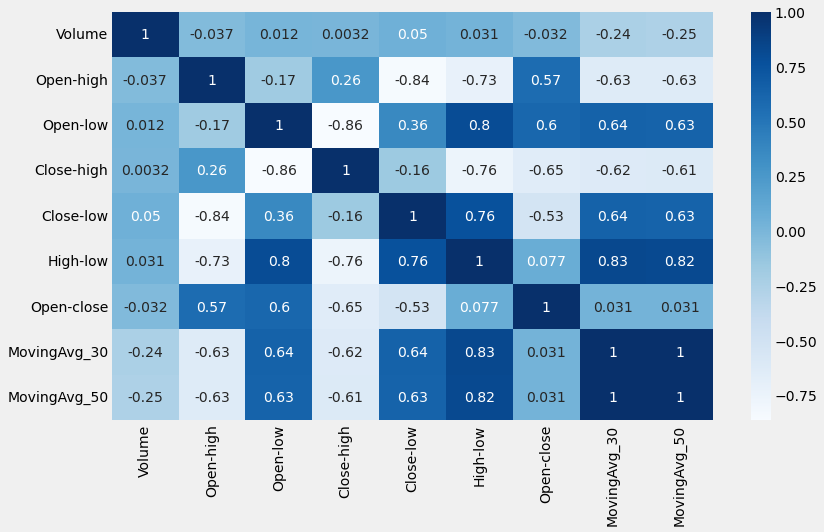

In [108]:
# drop old useless columns
tesla_transform_data = tesla_data.copy()
tesla_transform_data = tesla_transform_data.drop(['Open','High','Low','Close', 'Adj Close'],axis=1)
tesla_transform_df = pd.DataFrame(tesla_transform_data)
tesla_transform_df.head()
plt.figure(figsize=(12,7))
sns.heatmap(tesla_transform_df.corr(),cmap='Blues',annot=True)

<AxesSubplot:xlabel='High-low', ylabel='Volume'>

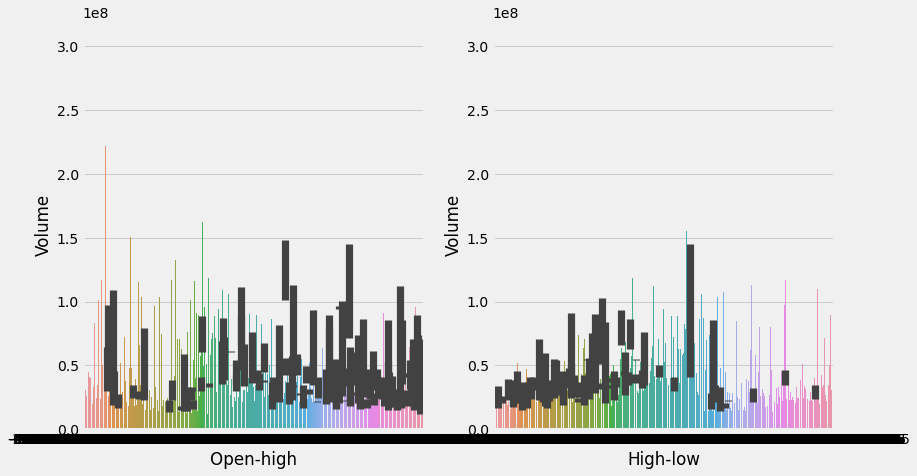

In [109]:
f, axes = plt.subplots(1, 2, figsize=(12,7))

# count = 0
# for var in numeric_df:
#     sb.boxplot(data = numeric_df[var], orient = "h", ax = axes[count,0])
#     sb.histplot(data = numeric_df[var], ax = axes[count,1])
#     sb.violinplot(data = numeric_df[var], orient = "h", ax = axes[count,2])
#     count += 1
sns.barplot(data=tesla_transform_df, x = "Open-high", y="Volume", ax=axes[0])
sns.barplot(data=tesla_transform_df, x = "High-low", y="Volume", ax=axes[1])

In [110]:

plt.style.use('fivethirtyeight')

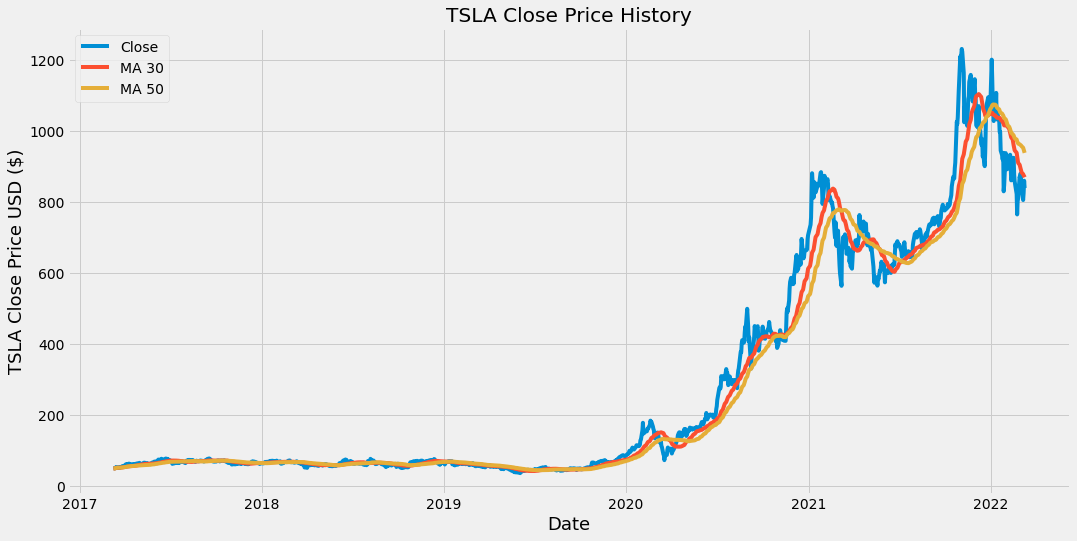

In [111]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title("TSLA Close Price History")
plt.xlabel('Date',fontsize=18)
plt.ylabel("TSLA Close Price USD ($)",fontsize=18)

plt.plot(tesla_data['Close'],label = "Close Price")
plt.plot(tesla_data['MovingAvg_30'],label ="MA 30")
plt.plot(tesla_data['MovingAvg_50'],label ="MA 50")
plt.legend(['Close','MA 30','MA 50'])
plt.show()

## LSTM, Step 1: Preparation of Hyperparameter LSTM functions

In [112]:
def getLSTMTrainData(predictionDays: int, scaled_data, trainLength:int):
    train_data = scaled_data[0:trainLength, :]
    #Split the data into x_train and y_train data sets
    #Independent training variable, list of 60 closing prices that is going to be used to predict next day closing price in y_train
    x_train, y_train = [], []
    #Dependent training variable, list of next day closing prices corresponding to each list in x_train to be predicted by LSTM
    #Append past 60 values of the train_data
    for i in range(predictionDays, trainLength):
        x_train.append(train_data[i-predictionDays:i, 0]) 
        y_train.append(train_data[i,0]) 
    x_train, y_train = np.array(x_train), np.array(y_train)
    # reshape as LSTM requires 3d array
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    return x_train, y_train

In [113]:
def trainLSTMHyper(x_train, y_train, x_test, hiddenNeurons, denseSize, batchSize, epochNo):
    #Building the LSTM model
    model = Sequential()
    #First LSTM layer, giving it hiddenNeurons neurons and return_sequences=True as we need to add another LSTM layer
    model.add(LSTM(hiddenNeurons, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    #Second LSTM layer
    model.add(LSTM(hiddenNeurons, return_sequences=False))
    #Dense layer with denseSize neurons
    model.add(Dense(denseSize))
    #Dense layer with 1 neuron
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, batch_size=batchSize, epochs=epochNo)
    predicted = model.predict(x_test)
    return predicted

In [114]:
def getLSTMTestData(prediction_days:int, dataset, scaled_data, trainLength:int):
    #Creating new array contained scaled values 
    test_data = scaled_data[trainLength - prediction_days: , :]
    x_test = []
    y_test = dataset[trainLength: , :] #Containing values our model want to predict
    for i in range(prediction_days, len(test_data)):
        x_test.append(test_data[i-prediction_days:i,0])#Append the past 60 values to test dataset
    #Converting into numpy array to use in LSTM model
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    return x_test, y_test

In [115]:
def evalPredicted(predicted, actual, modelName):
    # RMSE = np.sqrt(((predicted - actual) ** 2).mean())
    # R2 = met.r2_score(actual,predicted)
    MSE = met.mean_squared_error(actual, predicted)
    RMSE = math.sqrt(MSE)
    R2 = met.r2_score(actual,predicted)
    print('{modelName} Root Mean Squared Error is {rmse}'.format(modelName=modelName,rmse=RMSE))
    print('{modelName} R Squared is {r2}'.format(modelName=modelName,r2=R2))
    return RMSE, R2

In [116]:
def plotModelResult(closingPrices, trainLength, predicted, name):
    #Plot the data
    train = closingPrices[:trainLength] # no need ?
    data = closingPrices[trainLength:]
    data['Predicted']=predicted
    data.rename(columns={'Close':'Actual'},inplace = True)
    #Visualise the model
    plt.figure(figsize=(16,8))
    plt.title("{name} Close Price".format(name=name))
    plt.xlabel('Date',fontsize=18)
    plt.ylabel("{name} Close Price USD ($)".format(name=name,fontsize=18))
    #plt.plot(train['Close']) 
    plt.plot(data[['Actual','Predicted']])
    plt.legend(['Actual Price','Predicted Price'])

In [117]:
def getLSTMTrainLength(data):
    closingPrices = data.filter(['Close'])
    dataset = closingPrices.values
    trainLength = math.ceil(len(dataset)*.8) #Math.ceil to round up
    return trainLength

In [118]:
def runLSTMHyper(data, stockName, trainLength, hiddenNeurons, denseSize, batchSize, epochNo, predictionDays):
    """
    @input (data: df/df-like data of one stock, stockName: string of that stock)
    @output RMSE value of predicted against actual Values
    """
    closingPrices = data.filter(['Close'])
    dataset = closingPrices.values
    #Scale the data
    scaler = MinMaxScaler(feature_range=(0,1))
    #Computes min and max value to be used for scaling, then transforms the data based on the min max values
    scaled_data = scaler.fit_transform(dataset)
    #Create the training data set
    x_train, y_train = getLSTMTrainData(predictionDays, scaled_data, trainLength)
    x_test, y_test = getLSTMTestData(predictionDays, dataset, scaled_data, trainLength)
    predicted = trainLSTMHyper(x_train, y_train, x_test, hiddenNeurons, denseSize, batchSize, epochNo)
    predicted = scaler.inverse_transform(predicted)
    #plotModelResult(closingPrices, trainLength, predicted, stockName) #transferred to Step 3
    RMSE, R2 = evalPredicted(predicted, y_test, "LSTM")
    LSTM = data[trainLength:]
    LSTM['Predicted']=predicted
    LSTM.rename(columns={'Close':'Actual'},inplace = True)
    return RMSE, R2, LSTM

In [120]:
def getStockDf(stockName):
    """
    @input (stockName: string of that stock)
    @output df/df-like data of one stock
    """
    stockDf = globals()[stockName]
    return stockDf

## LSTM, Step 2: Running Hyperameter Tuning

In [122]:
data = getStockDf("TSLA")
trainLength = getLSTMTrainLength(data)

LSTMRmseAll = pd.DataFrame(columns=['hiddenNeurons','denseSize', 'predictionDays', 'epochNo', 'batchSize'])

#For testing, currently training 2x1x2x1x2 = 8 times
hiddenNeurons = [40, 80] #For testing, pick any 2 out of [20, 40, 60, 80, 100]
denseSize = [25] #For testing, pick any 1 out of [25, 50]
batchSize = [32, 64] #For testing, pick any 1 out of [32, 64, 128]
epochNo = [50] #For testing, pick any 1 out of [50, 100, 150]
predictionDays = [60, 65] #For testing, pick any 2 out of [60, 65, 70]
#For actual, will be training 5x2x3x3x3 = 270 times (do at lab btr?)

for neurons in hiddenNeurons:
    for dense in denseSize:
        for prediction in predictionDays:
            for epoch in epochNo:
                for batch_size in batchSize:
                    from keras.layers import Dense, LSTM, Dropout #ok damn stupid to include here but if dont theres error
                    LstmRMSE, LstmR2, LSTM = runLSTMHyper(data, "TSLA", trainLength, neurons, dense, batch_size, epoch, prediction)
                    tempDF = pd.DataFrame([[neurons, dense, prediction, epoch, batch_size, LstmRMSE, LstmR2, LSTM[['Actual','Predicted']]]],
                    columns=['hiddenNeurons','denseSize', 'predictionDays', 'epochNo', 'batchSize', 'RMSE', 'R^2', 'LSTM'])
                    LSTMRmseAll = pd.concat([LSTMRmseAll, tempDF], ignore_index=True)

Epoch 1/50
30/30 [==============================] - 5s 36ms/step - loss: 0.0076
Epoch 2/50
30/30 [==============================] - 1s 36ms/step - loss: 7.0463e-04
Epoch 3/50
30/30 [==============================] - 1s 36ms/step - loss: 7.2797e-04
Epoch 4/50
30/30 [==============================] - 1s 36ms/step - loss: 4.7119e-04
Epoch 5/50
30/30 [==============================] - 1s 36ms/step - loss: 4.0841e-04
Epoch 6/50
30/30 [==============================] - 1s 36ms/step - loss: 3.7970e-04
Epoch 7/50
30/30 [==============================] - 1s 36ms/step - loss: 3.6553e-04
Epoch 8/50
30/30 [==============================] - 1s 37ms/step - loss: 3.3998e-04
Epoch 9/50
30/30 [==============================] - 1s 37ms/step - loss: 3.2298e-04
Epoch 10/50
30/30 [==============================] - 1s 39ms/step - loss: 3.4676e-04
Epoch 11/50
30/30 [==============================] - 1s 37ms/step - loss: 3.2351e-04
Epoch 12/50
30/30 [==============================] - 1s 37ms/step - loss: 3.29

C:\Users\Alex\AppData\Local\Temp\ipykernel_15136\657461918.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LSTM['Predicted']=predicted
C:\Users\Alex\AppData\Local\Temp\ipykernel_15136\657461918.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LSTM.rename(columns={'Close':'Actual'},inplace = True)


Epoch 1/50
15/15 [==============================] - 4s 40ms/step - loss: 0.0104
Epoch 2/50
15/15 [==============================] - 1s 40ms/step - loss: 0.0014
Epoch 3/50
15/15 [==============================] - 1s 39ms/step - loss: 6.7101e-04
Epoch 4/50
15/15 [==============================] - 1s 40ms/step - loss: 5.1581e-04
Epoch 5/50
15/15 [==============================] - 1s 39ms/step - loss: 4.6998e-04
Epoch 6/50
15/15 [==============================] - 1s 39ms/step - loss: 4.4525e-04
Epoch 7/50
15/15 [==============================] - 1s 42ms/step - loss: 3.9469e-04
Epoch 8/50
15/15 [==============================] - 1s 39ms/step - loss: 3.4419e-04
Epoch 9/50
15/15 [==============================] - 1s 39ms/step - loss: 3.5485e-04
Epoch 10/50
15/15 [==============================] - 1s 40ms/step - loss: 2.9617e-04
Epoch 11/50
15/15 [==============================] - 1s 39ms/step - loss: 2.9508e-04
Epoch 12/50
15/15 [==============================] - 1s 40ms/step - loss: 2.8708e-

C:\Users\Alex\AppData\Local\Temp\ipykernel_15136\657461918.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LSTM['Predicted']=predicted
C:\Users\Alex\AppData\Local\Temp\ipykernel_15136\657461918.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LSTM.rename(columns={'Close':'Actual'},inplace = True)


Epoch 1/50
30/30 [==============================] - 4s 38ms/step - loss: 0.0085
Epoch 2/50
30/30 [==============================] - 1s 38ms/step - loss: 7.2819e-04
Epoch 3/50
30/30 [==============================] - 1s 38ms/step - loss: 4.5410e-04
Epoch 4/50
30/30 [==============================] - 1s 38ms/step - loss: 4.6876e-04
Epoch 5/50
30/30 [==============================] - 1s 39ms/step - loss: 4.0205e-04
Epoch 6/50
30/30 [==============================] - 1s 38ms/step - loss: 3.2236e-04
Epoch 7/50
30/30 [==============================] - 1s 38ms/step - loss: 3.0513e-04
Epoch 8/50
30/30 [==============================] - 1s 38ms/step - loss: 3.0587e-04
Epoch 9/50
30/30 [==============================] - 1s 38ms/step - loss: 3.6679e-04
Epoch 10/50
30/30 [==============================] - 1s 40ms/step - loss: 2.8814e-04
Epoch 11/50
30/30 [==============================] - 1s 38ms/step - loss: 2.7948e-04
Epoch 12/50
30/30 [==============================] - 1s 38ms/step - loss: 2.80

C:\Users\Alex\AppData\Local\Temp\ipykernel_15136\657461918.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LSTM['Predicted']=predicted
C:\Users\Alex\AppData\Local\Temp\ipykernel_15136\657461918.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LSTM.rename(columns={'Close':'Actual'},inplace = True)


Epoch 1/50
15/15 [==============================] - 4s 43ms/step - loss: 0.0066
Epoch 2/50
15/15 [==============================] - 1s 42ms/step - loss: 0.0011
Epoch 3/50
15/15 [==============================] - 1s 42ms/step - loss: 5.4878e-04
Epoch 4/50
15/15 [==============================] - 1s 43ms/step - loss: 4.9927e-04
Epoch 5/50
15/15 [==============================] - 1s 43ms/step - loss: 4.2622e-04
Epoch 6/50
15/15 [==============================] - 1s 43ms/step - loss: 3.8553e-04
Epoch 7/50
15/15 [==============================] - 1s 44ms/step - loss: 3.9785e-04
Epoch 8/50
15/15 [==============================] - 1s 43ms/step - loss: 3.3281e-04
Epoch 9/50
15/15 [==============================] - 1s 44ms/step - loss: 3.1614e-04
Epoch 10/50
15/15 [==============================] - 1s 43ms/step - loss: 3.0749e-04
Epoch 11/50
15/15 [==============================] - 1s 45ms/step - loss: 2.9243e-04
Epoch 12/50
15/15 [==============================] - 1s 45ms/step - loss: 3.1796e-

C:\Users\Alex\AppData\Local\Temp\ipykernel_15136\657461918.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LSTM['Predicted']=predicted
C:\Users\Alex\AppData\Local\Temp\ipykernel_15136\657461918.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LSTM.rename(columns={'Close':'Actual'},inplace = True)


Epoch 1/50
30/30 [==============================] - 5s 41ms/step - loss: 0.0026
Epoch 2/50
30/30 [==============================] - 1s 46ms/step - loss: 6.1110e-04
Epoch 3/50
30/30 [==============================] - 1s 43ms/step - loss: 4.0414e-04
Epoch 4/50
30/30 [==============================] - 1s 41ms/step - loss: 5.7741e-04
Epoch 5/50
30/30 [==============================] - 1s 46ms/step - loss: 4.1366e-04
Epoch 6/50
30/30 [==============================] - 1s 41ms/step - loss: 3.1043e-04
Epoch 7/50
30/30 [==============================] - 1s 41ms/step - loss: 3.0895e-04
Epoch 8/50
30/30 [==============================] - 1s 41ms/step - loss: 3.6635e-04
Epoch 9/50
30/30 [==============================] - 1s 40ms/step - loss: 2.7176e-04
Epoch 10/50
30/30 [==============================] - 1s 40ms/step - loss: 2.4779e-04
Epoch 11/50
30/30 [==============================] - 1s 40ms/step - loss: 2.7653e-04
Epoch 12/50
30/30 [==============================] - 1s 40ms/step - loss: 2.87

C:\Users\Alex\AppData\Local\Temp\ipykernel_15136\657461918.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LSTM['Predicted']=predicted
C:\Users\Alex\AppData\Local\Temp\ipykernel_15136\657461918.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LSTM.rename(columns={'Close':'Actual'},inplace = True)


Epoch 1/50
15/15 [==============================] - 4s 49ms/step - loss: 0.0090
Epoch 2/50
15/15 [==============================] - 1s 49ms/step - loss: 0.0013
Epoch 3/50
15/15 [==============================] - 1s 47ms/step - loss: 6.6389e-04
Epoch 4/50
15/15 [==============================] - 1s 48ms/step - loss: 5.2163e-04
Epoch 5/50
15/15 [==============================] - 1s 51ms/step - loss: 4.2751e-04
Epoch 6/50
15/15 [==============================] - 1s 49ms/step - loss: 4.0112e-04
Epoch 7/50
15/15 [==============================] - 1s 47ms/step - loss: 3.8896e-04
Epoch 8/50
15/15 [==============================] - 1s 47ms/step - loss: 3.7869e-04
Epoch 9/50
15/15 [==============================] - 1s 47ms/step - loss: 3.3949e-04
Epoch 10/50
15/15 [==============================] - 1s 46ms/step - loss: 3.3173e-04
Epoch 11/50
15/15 [==============================] - 1s 47ms/step - loss: 3.2288e-04
Epoch 12/50
15/15 [==============================] - 1s 46ms/step - loss: 3.0488e-

C:\Users\Alex\AppData\Local\Temp\ipykernel_15136\657461918.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LSTM['Predicted']=predicted
C:\Users\Alex\AppData\Local\Temp\ipykernel_15136\657461918.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LSTM.rename(columns={'Close':'Actual'},inplace = True)


Epoch 1/50
30/30 [==============================] - 4s 43ms/step - loss: 0.0034
Epoch 2/50
30/30 [==============================] - 1s 43ms/step - loss: 4.2616e-04
Epoch 3/50
30/30 [==============================] - 1s 42ms/step - loss: 3.7802e-04
Epoch 4/50
30/30 [==============================] - 1s 44ms/step - loss: 3.3602e-04
Epoch 5/50
30/30 [==============================] - 1s 43ms/step - loss: 3.1408e-04
Epoch 6/50
30/30 [==============================] - 1s 45ms/step - loss: 2.6718e-04
Epoch 7/50
30/30 [==============================] - 1s 43ms/step - loss: 2.6142e-04
Epoch 8/50
30/30 [==============================] - 1s 44ms/step - loss: 2.8959e-04
Epoch 9/50
30/30 [==============================] - 1s 44ms/step - loss: 3.3412e-04
Epoch 10/50
30/30 [==============================] - 1s 44ms/step - loss: 2.6617e-04
Epoch 11/50
30/30 [==============================] - 1s 43ms/step - loss: 3.0371e-04
Epoch 12/50
30/30 [==============================] - 1s 44ms/step - loss: 2.61

C:\Users\Alex\AppData\Local\Temp\ipykernel_15136\657461918.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LSTM['Predicted']=predicted
C:\Users\Alex\AppData\Local\Temp\ipykernel_15136\657461918.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LSTM.rename(columns={'Close':'Actual'},inplace = True)


Epoch 1/50
15/15 [==============================] - 4s 54ms/step - loss: 0.0075
Epoch 2/50
15/15 [==============================] - 1s 52ms/step - loss: 8.0199e-04
Epoch 3/50
15/15 [==============================] - 1s 53ms/step - loss: 5.2527e-04
Epoch 4/50
15/15 [==============================] - 1s 49ms/step - loss: 3.9864e-04
Epoch 5/50
15/15 [==============================] - 1s 53ms/step - loss: 3.3648e-04
Epoch 6/50
15/15 [==============================] - 1s 52ms/step - loss: 4.0926e-04
Epoch 7/50
15/15 [==============================] - 1s 52ms/step - loss: 6.1485e-04
Epoch 8/50
15/15 [==============================] - 1s 53ms/step - loss: 5.3138e-04
Epoch 9/50
15/15 [==============================] - 1s 52ms/step - loss: 3.2600e-04
Epoch 10/50
15/15 [==============================] - 1s 53ms/step - loss: 2.7192e-04
Epoch 11/50
15/15 [==============================] - 1s 51ms/step - loss: 2.6547e-04
Epoch 12/50
15/15 [==============================] - 1s 51ms/step - loss: 2.76

C:\Users\Alex\AppData\Local\Temp\ipykernel_15136\657461918.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LSTM['Predicted']=predicted
C:\Users\Alex\AppData\Local\Temp\ipykernel_15136\657461918.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LSTM.rename(columns={'Close':'Actual'},inplace = True)


In [123]:
#this dataframe currently has LSTM so that we can extract the best LSTM dataframe for further analysis (if needed)
LSTMRmseAll

,hiddenNeurons,denseSize,predictionDays,epochNo,batchSize,RMSE,R^2,LSTM
0,40,25,60,50,32,45.237364,0.931303,Actual Predicted New_ID ...
1,40,25,60,50,64,53.070373,0.905454,Actual Predicted New_ID ...
2,40,25,65,50,32,43.823876,0.935529,Actual Predicted New_ID ...
3,40,25,65,50,64,59.141539,0.882584,Actual Predicted New_ID ...
4,80,25,60,50,32,34.260780,0.960596,Actual Predicted New_ID ...
5,80,25,60,50,64,66.960802,0.849484,Actual Predicted New_ID ...
6,80,25,65,50,32,32.913660,0.963634,Actual Predicted New_ID ...
7,80,25,65,50,64,43.007328,0.937909,Actual Predicted New_ID ...


In [124]:
def getBetterLSTM(LSTMRmseAll):
    minRMSE = LSTMRmseAll['RMSE'].min()
    minRMSERow = LSTMRmseAll['RMSE'].idxmin()
    betterLSTM = LSTMRmseAll.loc[minRMSERow,'LSTM']
    maxR2 = LSTMRmseAll['R^2'].max()
    return minRMSE, minRMSERow, betterLSTM, maxR2

In [125]:
minRMSE, minRMSERow, betterLSTM, maxR2 = getBetterLSTM(LSTMRmseAll)
print("Smallest RMSE is " + str(minRMSE) + " and best R^2 is "+ str(maxR2) + " located at Row " + str(minRMSERow))
LSTMRmseAll.iloc[[minRMSERow]]

Smallest RMSE is 32.91366026045978 and best R^2 is 0.963634176758489 located at Row 6


,hiddenNeurons,denseSize,predictionDays,epochNo,batchSize,RMSE,R^2,LSTM
6,80,25,65,50,32,32.91366,0.963634,Actual Predicted New_ID ...


In [126]:
betterLSTM

,Actual,Predicted
New_ID,,
1009,693.729980,691.273987
1010,707.940002,703.366760
1011,676.880005,713.312073
1012,701.809998,698.757629
1013,653.159973,701.503662
...,...,...
1256,838.289978,857.297424
1257,804.580017,842.562378
1258,824.400024,815.309753


## LSTM, Step 3: Graphical representation of 80% train & 20% test on the best combination of hyperparameters resulting in best LSTM model

C:\Users\Alex\AppData\Local\Temp\ipykernel_15136\3753625681.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicted']=predicted
C:\Users\Alex\AppData\Local\Temp\ipykernel_15136\3753625681.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Close':'Actual'},inplace = True)


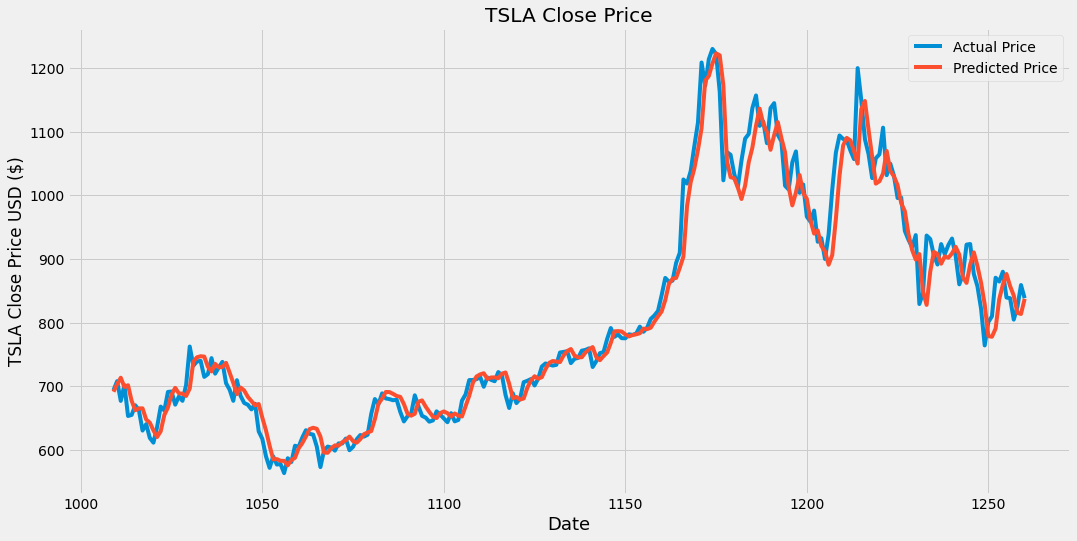

In [127]:
plotModelResult(data.filter(['Close']), trainLength, betterLSTM['Predicted'], "TSLA")

## LSTM, Step 4: To train model multiple times like ARIMA, append actual value of present day to training data, then predict next day.

In [128]:
#Yet to implement

## LSTM, Step 5: Uncertainty/confidence interval(level) for LSTM??

In [129]:
#Yet to implement

## END OF LSTM SEGMENT, MOVING ON TO ARIMA

In [62]:
tesla_data

,Open,High,Low,Close,Adj Close,Volume,company_name,Open-high,Open-low,Close-high,Close-low,High-low,Open-close,MovingAvg_30,MovingAvg_50
DateTime,,,,,,,,,,,,,,,
2021-03-10,700.299988,717.849976,655.059998,668.059998,668.059998,60605700,TESLA,-17.549988,45.239990,-49.789978,13.000000,62.789978,32.239990,668.059998,668.059998
2021-03-11,699.400024,702.500000,677.179993,699.599976,699.599976,36253900,TESLA,-3.099976,22.220032,-2.900024,22.419983,25.320007,-0.199951,683.829987,683.829987
2021-03-12,670.000000,694.880005,666.140015,693.729980,693.729980,33583800,TESLA,-24.880005,3.859985,-1.150024,27.589966,28.739990,-23.729980,687.129985,687.129985
2021-03-15,694.090027,713.179993,684.039978,707.940002,707.940002,29335600,TESLA,-19.089966,10.050049,-5.239990,23.900024,29.140015,-13.849976,692.332489,692.332489
2021-03-16,703.349976,707.919983,671.000000,676.880005,676.880005,32195700,TESLA,-4.570007,32.349976,-31.039978,5.880005,36.919983,26.469971,689.241992,689.241992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-04,849.099976,855.650024,825.159973,838.289978,838.289978,22333200,TESLA,-6.550049,23.940002,-17.360046,13.130005,30.490051,10.809998,882.084330,955.912195
2022-03-07,856.299988,866.140015,804.570007,804.580017,804.580017,24164700,TESLA,-9.840027,51.729980,-61.559998,0.010010,61.570007,51.719971,877.440330,951.826395
2022-03-08,795.530029,849.989990,782.169983,824.400024,824.400024,26799700,TESLA,-54.459961,13.360046,-25.589966,42.230042,67.820007,-28.869995,873.920331,946.974396


In [63]:

train_data, test_data = tesla_data[0:int(len(tesla_data)*0.8)], tesla_data[int(len(tesla_data)*0.8):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = met.mean_squared_error(test_data, model_predictions)
Arima_RMSE = math.sqrt(MSE_error)
print('Testing Root Mean Squared Error is {}'.format(Arima_RMSE))
ARIMAr2 = met.r2_score(test_data,model_predictions)
print('Testing R Squared Error is {}'.format(ARIMAr2))

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Testing Root Mean Squared Error is 42.82069467876911
Testing R Squared Error is 0.8259735178345258


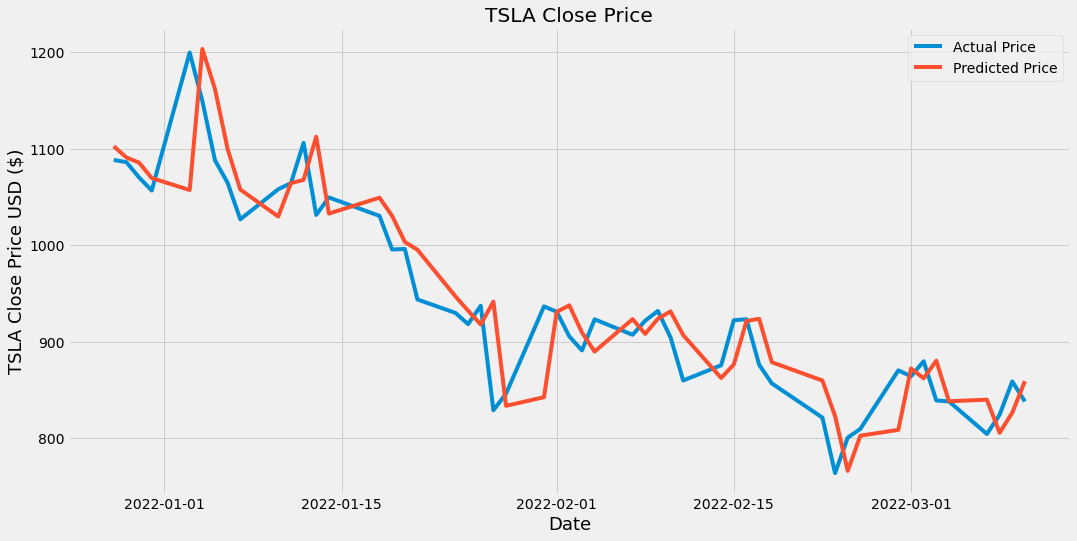

In [64]:
test_set_range = tesla_data[int(len(tesla_data)*0.8):].index
plt.figure(figsize=(16,8))

plt.plot(test_set_range, test_data, label='Actual Price')
plt.plot(test_set_range, model_predictions, label='Predicted Price')
plt.title("TSLA Close Price")
plt.xlabel('Date',fontsize=18)
plt.ylabel("TSLA Close Price USD ($)",fontsize=18)
#plt.xticks(np.arange(881,1259,50), tesla_data['DateTime'][881:1259:50])
plt.legend()
plt.show()





In [65]:
ARIMA=pd.DataFrame({"Actual":test_data})
ARIMA["Predicted"]=pd.DataFrame(model_predictions)
ARIMA.head()

,Actual,Predicted
0,1088.469971,1102.609871
1,1086.189941,1091.007091
2,1070.339966,1085.689602
3,1056.780029,1069.709483
4,1199.780029,1057.302124


ARIMA Testing Root Mean Squared Error is 42.82069467876911
LSTM Testing Root Mean Squared Error is 91.92137971815178


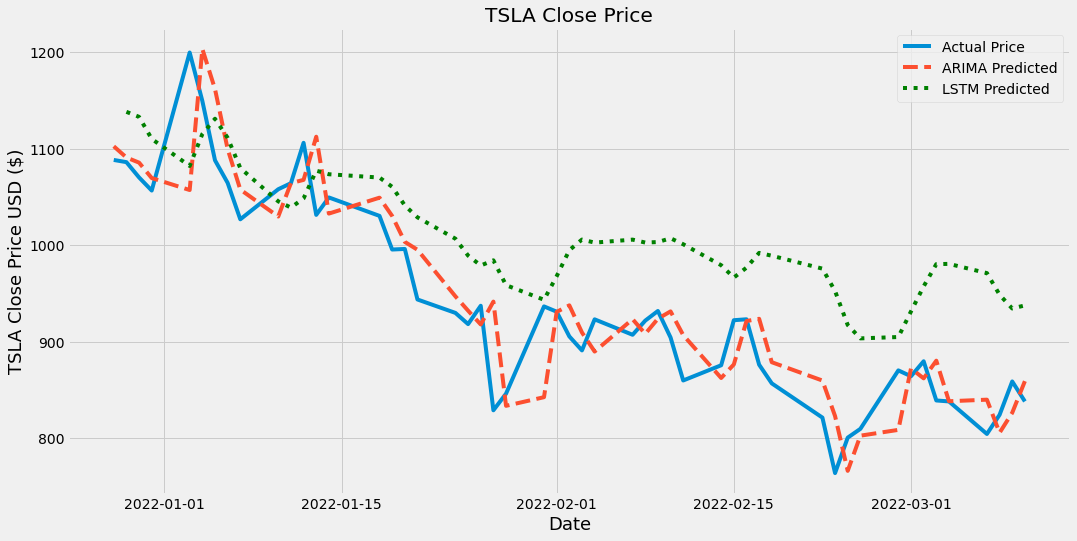

In [66]:
#2 models 
print('ARIMA Testing Root Mean Squared Error is {}'.format(Arima_RMSE))
print('LSTM Testing Root Mean Squared Error is {}'.format(LSTM_RMSE))
plt.figure(figsize=(16,8))

plt.plot(test_set_range, test_data, label='Actual Price')
plt.plot(test_set_range, model_predictions,linestyle='dashed', label='ARIMA Predicted')
plt.plot(LSTM['Predicted'],linestyle='dotted',color='green', label ='LSTM Predicted')
plt.title("TSLA Close Price")
plt.xlabel('Date',fontsize=18)
plt.ylabel("TSLA Close Price USD ($)",fontsize=18)

plt.legend()
plt.show()


### Based on the MSE and R2 value ARIMA has the better for TSLA. (might not be true for other stocks due to different price level swings. 


In [67]:
def getBetterModel(ArimaRMSE,LstmRMSE,ARIMA,LSTM): #deemed that RMSE is more important than R2
    if ArimaRMSE<LstmRMSE:
        print("ARIMA is Optimal")
        return ARIMA #data fram of predicted and actual
    else:
        print("LSTM is Optimal")
        return LSTM

In [68]:
Optimal = getBetterModel(Arima_RMSE,LSTM_RMSE,ARIMA,LSTM)
Optimal

ARIMA is Optimal


,Actual,Predicted
0,1088.469971,1102.609871
1,1086.189941,1091.007091
2,1070.339966,1085.689602
3,1056.780029,1069.709483
4,1199.780029,1057.302124
5,1149.589966,1203.467294
6,1088.119995,1161.932022
7,1064.699951,1099.729548
8,1026.959961,1057.793503
9,1058.119995,1029.850009


In [130]:
def isLong(actual,predicted):
    
    if float(actual)< float(predicted):
        return True
    else:
        return False


2 1
True


In [157]:
def dailySwing(table):
    actual = table['Actual']
    print(type(actual))

    predicted = table['Predicted']
    isCurrentPositionLong = None
    price = 0
    position = 0
    profit = 0
    for day in range(len(table)-1):
        price = actual[day]
        
        nextPrice = predicted[day+1]
        if isCurrentPositionLong is None: #day 0 initalize
            position = price
            if isLong(float(price),float(nextPrice)):
                isCurrentPositionLong = True
            else:
                isCurrentPositionLong= False

                      
         
        if isLong(actual[day],predicted[day+1]): #predicted increase tomorrow
            if isCurrentPositionLong:
                continue
                  
            else:
                #print("SL day",day)
                profit +=   position - price 
                #print("Current Profit ",profit,"day ",day,"position",position, "Price",price)
                position = price
                #print("new pos",position)
                isCurrentPositionLong = True
                
        else: #predicted decrease tomorrow
            if not isCurrentPositionLong:
                continue
                  
            else:
                #print("LS day",day)
                profit += price - position 
                #print("Current Profit ",profit,"day ",day,"position",position,"Price",price)
                position = price
                #print("new pos",position)
                isCurrentPositionLong = False
                
    if isCurrentPositionLong:
        profit += actual[len(table)-1] - position 
        
    else:
        profit +=   position - actual[len(table)-1]
    return profit

In [199]:
profit = dailySwing(Optimal)
profit

<class 'pandas.core.series.Series'>


28.54998779296875

In [172]:
def minMaxSwing(table):
    predicted = table['Predicted']
    actual=table["Actual"]
    minVal = predicted[0]
    maxVal = predicted[0]
    minDay = 0
    maxDay = 0
    for day in range(len(predicted)):
        if minVal> predicted[day]:
            minVal =predicted[day]
            minDay = day
        if maxVal < predicted[day]:
            maxVal = predicted[day]
            maxDay = day
    if maxDay>minDay:
        print("Long Position Swing")
        print("Buy on day", minDay,"at predicted",predicted[minDay],"But actual is ",actual[minDay])
        print("Sell on day", maxDay,"at predicted",predicted[maxDay],"but actual is",actual[maxDay])
        print("For profit" ,actual[maxDay]-actual[minDay])
    else:
        print("Short Position Swing")
        print("Start short on ", maxDay,"with predicted price of",predicted[maxDay],"But actual is",actual[maxDay])
        print("Sell short on ",minDay,"at predicted",predicted[minDay],"but actual is",actual[minDay])
        print("For profit" ,actual[maxDay]-actual[minDay])
    return actual[maxDay]-actual[minDay]

In [200]:
minMaxSwing(Optimal)

Short Position Swing
Start short on  0 with predicted price of 1138.3177 But actual is 1086.18994140625
Sell short on  40 at predicted 903.6021 but actual is 809.8699951171875
For profit 276.3199462890625


In [174]:
def buyandHold(table):
    actual = table['Actual']
    buy = actual[0]
    sell = actual[len(actual)-1]
    profit = sell - buy
    if profit<0:
        print("loss",profit)
        return profit
    else:
        print("profit",profit)
        return profit

In [201]:
buyandHold(Optimal)

loss -247.88995361328125


-247.88995361328125

In [190]:
def longOnly(table):
    actual = table['Actual']
    print(type(actual))

    predicted = table['Predicted']
    activePosition = False
    price = 0
    position = 0
    profit = 0
    for day in range(len(table)-1):
        price = actual[day]
        
        nextPrice = predicted[day+1]        
                               
        if isLong(price,nextPrice): #predicted increase tomorrow
            if activePosition:
                continue
            else:
                position = price
                
                activePosition=True
                  
                
        else: #predicted decrease tomorrow
            #print("LS day",day)
            if activePosition:
                profit += price - position #selling off position
               
                activePosition = False
                
    if activePosition:
        profit += actual[len(table)-1] - position 
        
    return profit

In [203]:
longOnlyProfit = longOnly(Optimal)
longOnlyProfit

<class 'pandas.core.series.Series'>
POS 1088.469970703125 0
PROFIT -2.280029296875 1
POS 1056.780029296875 3
PROFIT 5.639892578125 7
POS 1026.9599609375 8
PROFIT 28.2899169921875 13
POS 995.6500244140625 15
PROFIT 28.909912109375 16
POS 943.9000244140625 17
PROFIT 3.409912109375 19
POS 937.4099731445312 20
PROFIT -87.65008544921875 22
POS 931.25 24
PROFIT -127.76007080078125 26
POS 923.3200073242188 27
PROFIT -119.080078125 30
POS 904.5499877929688 31
PROFIT -101.2000732421875 34
POS 923.3900146484375 35
PROFIT -214.7200927734375 41
POS 870.4299926757812 42
PROFIT -220.78009033203125 43
POS 879.8900146484375 44
PROFIT -261.380126953125 45
POS 838.2899780273438 46


-261.3701171875

In [193]:
def shortOnly(table):
    actual = table['Actual']
    print(type(actual))

    predicted = table['Predicted']
    activePosition = False
    price = 0
    position = 0
    profit = 0
    for day in range(len(table)-1):
        price = actual[day]
        
        nextPrice = predicted[day+1]        
                               
        if not isLong(price,nextPrice): #predicted decrease tomorrow
            if activePosition:
                continue
            else:
                position = price
                
                activePosition=True
                  
                
        else: #predicted increase tomorrow
            #print("LS day",day)
            if activePosition:
                profit +=  position - price #selling off position
               
                activePosition = False
                
    if activePosition:
        profit += position -actual[len(table)-1]
        
    return profit

In [204]:
shortOnlyProfit=shortOnly(Optimal)
shortOnlyProfit

<class 'pandas.core.series.Series'>


138.219970703125